Projeto Ciência de Dados - Previsão de Preços:
Prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.
(olhar tabelas.png)

In [2]:
import pandas as pd

tabela = pd.read_csv('barcos_ref.csv')
display(tabela)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [3]:
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


<AxesSubplot:>

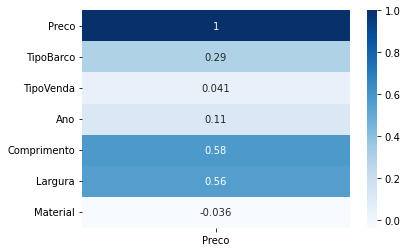

In [13]:
#correlação entre as informações
correlacao = tabela.corr()[['Preco']]
display(correlacao)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlacao, cmap='Blues', annot=True)

In [15]:
#modelagem + algoritmos

y = tabela['Preco']
x = tabela.drop('Preco', axis=1)

#train test split
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

In [20]:
#importar IA
#regressão linear e árvore de decisão
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#criar IA
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#treinar
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)



RandomForestRegressor()

In [21]:
#escolher melhor modelo
#R²
from sklearn.metrics import r2_score

previsao_reglinear = modelo_regressaolinear.predict(x_teste)
previsao_arvorededecisao = modelo_arvoredecisao.predict(x_teste)

print(r2_score(y_teste, previsao_reglinear))
print(r2_score(y_teste, previsao_arvorededecisao))


0.42430021970757004
0.8756737271787915


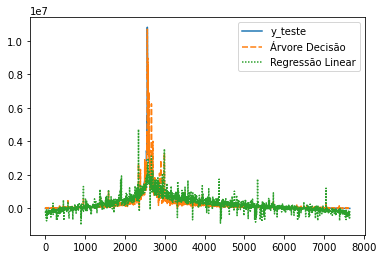

In [22]:
tab_auxiliar = pd.DataFrame()
tab_auxiliar['y_teste'] = y_teste
tab_auxiliar['Árvore Decisão'] = previsao_arvorededecisao
tab_auxiliar['Regressão Linear'] = previsao_reglinear

sns.lineplot(data=tab_auxiliar)
plt.show()

In [42]:
#novas previsões
tab_nova = pd.read_csv('novos_barcos.csv')

previsao = modelo_arvoredecisao.predict(tab_nova)
tab_nova['Preço'] = previsao
display(tab_nova)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material,Preço
0,2,3,2023,3.0,1.5,1,8889.97
1,2,1,2023,3.8,1.9,2,10890.42
2,3,2,1999,6.2,3.0,2,16763.50
